In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl 
import geopandas as gpd
from shapely import wkt

In [2]:
linies = []

linia1 = pd.read_excel("Data/rawData/TMB/linia1.xlsx")
linies.append(linia1)
linia2 = pd.read_excel("Data/rawData/TMB/linia2.xlsx")
linies.append(linia2)
linia3 = pd.read_excel("Data/rawData/TMB/linia3.xlsx")
linies.append(linia3)
linia4 = pd.read_excel("Data/rawData/TMB/linia4.xlsx")
linies.append(linia4)
linia5 = pd.read_excel("Data/rawData/TMB/linia5.xlsx")
linies.append(linia5)
linia910N = pd.read_excel("Data/rawData/TMB/linia910nord.xlsx")
linies.append(linia910N)
linia910S = pd.read_excel("Data/rawData/TMB/linia910sud.xlsx")
linies.append(linia910S)
linia11 = pd.read_excel("Data/rawData/TMB/linia11.xlsx")
linies.append(linia11)



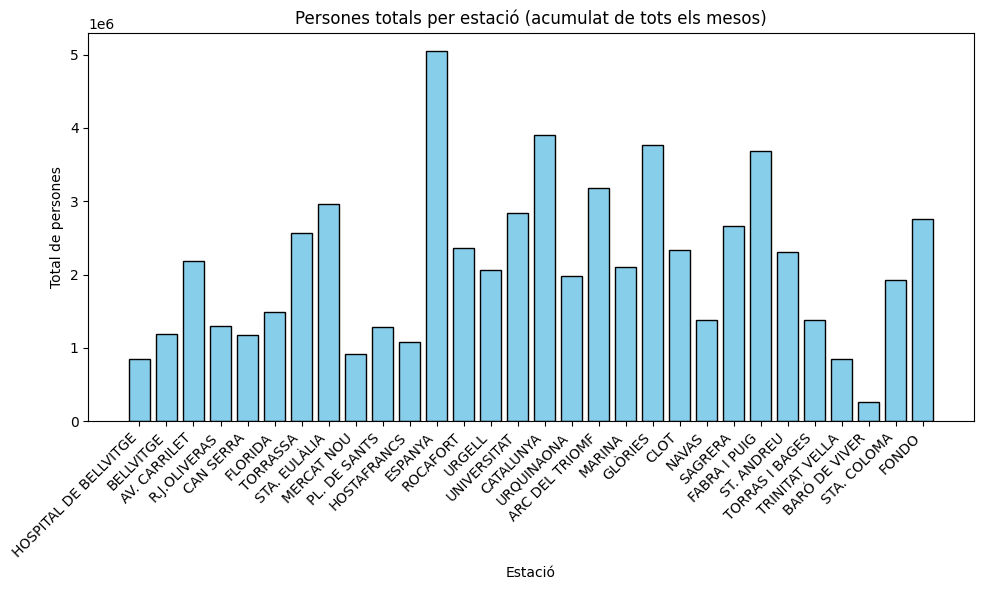

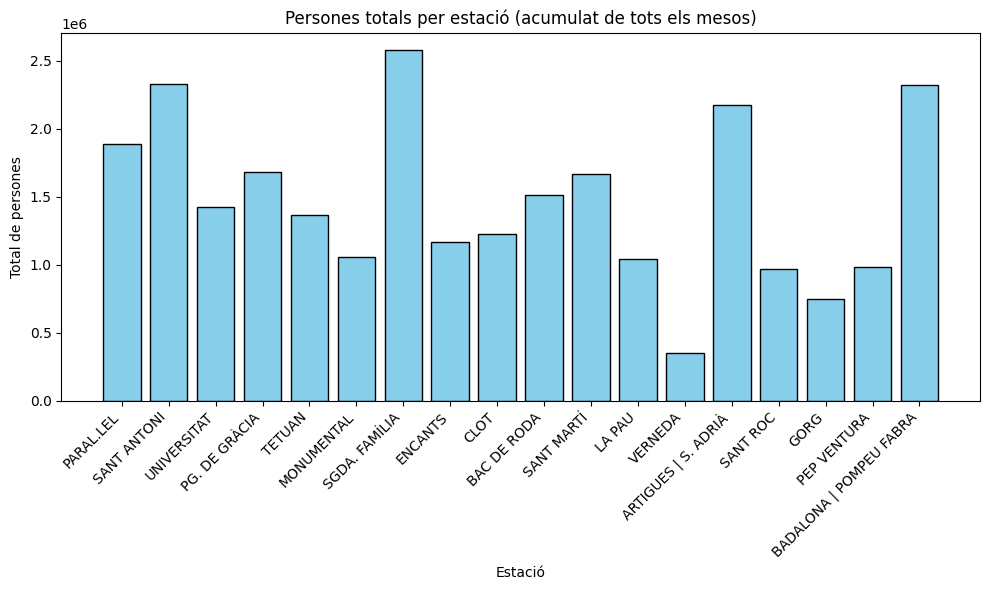

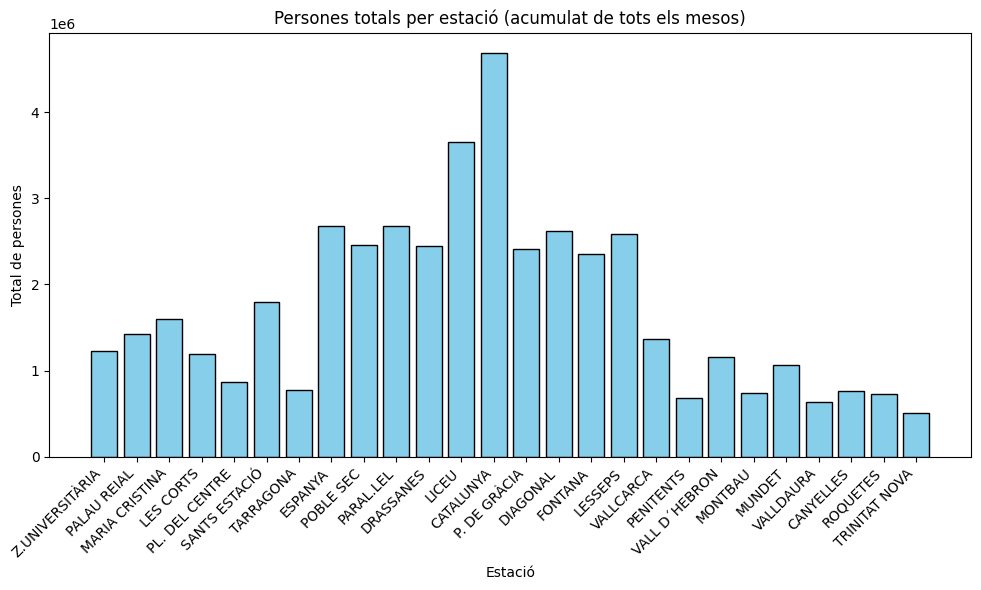

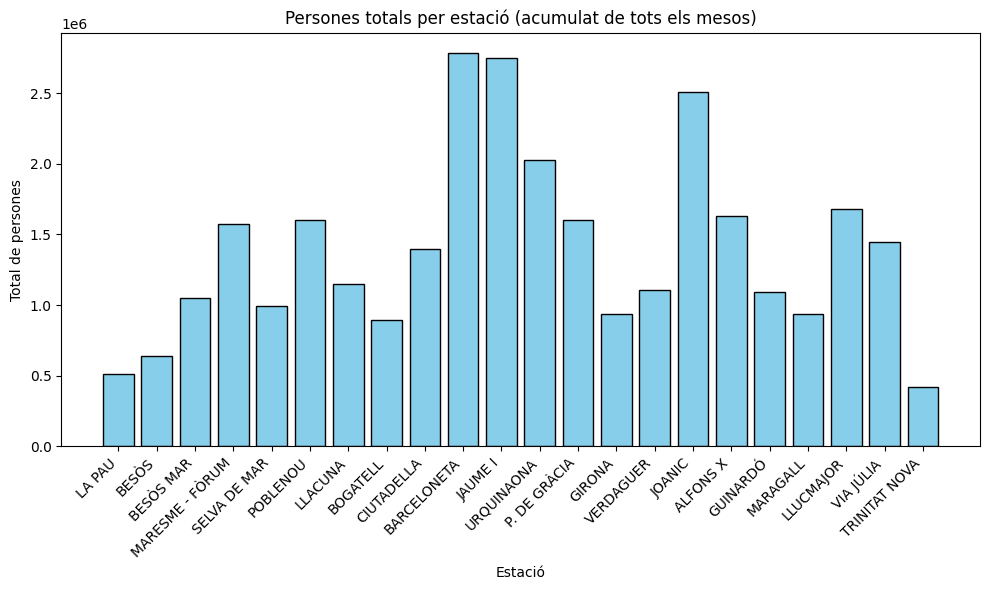

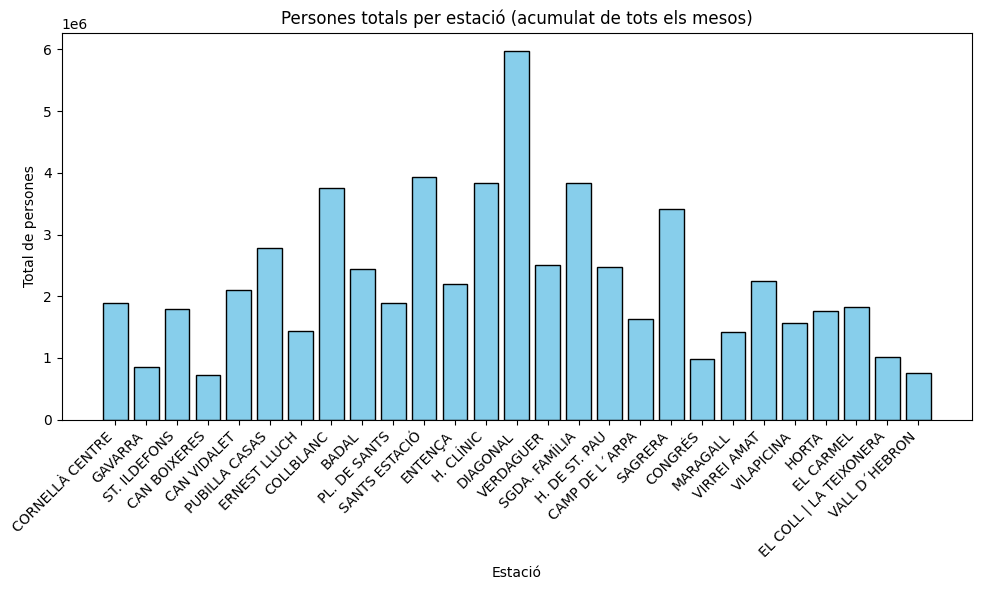

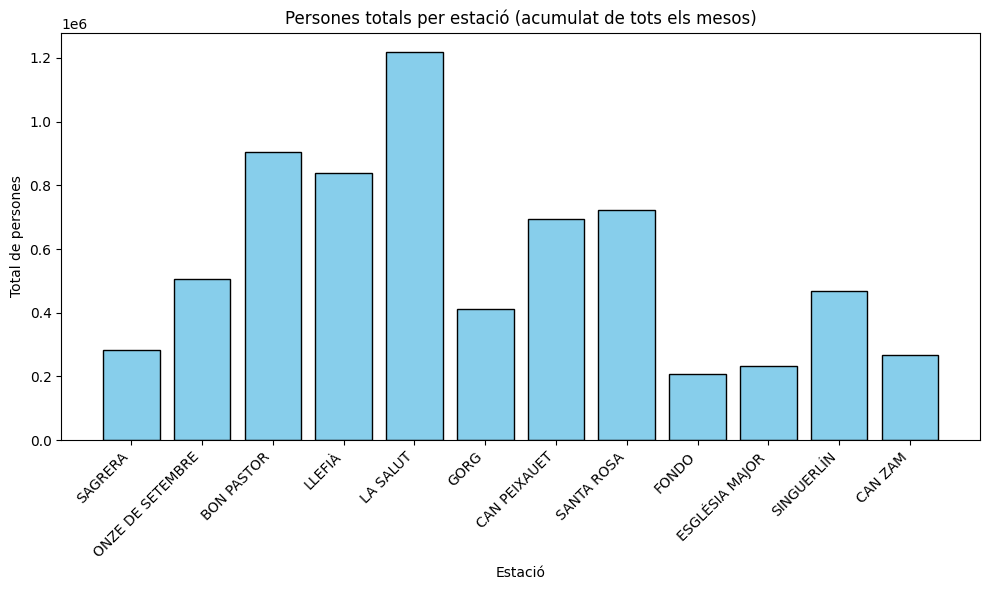

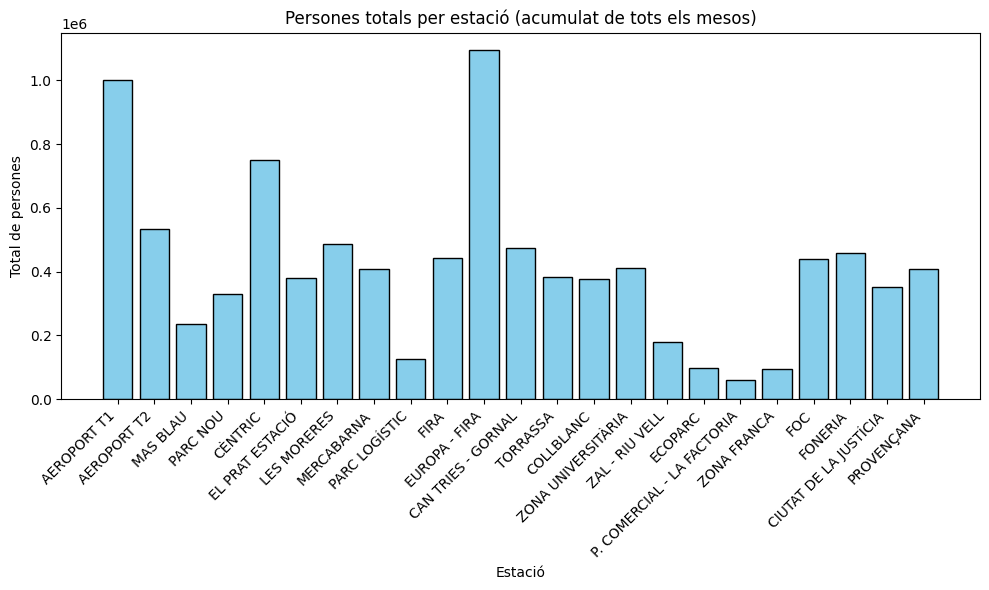

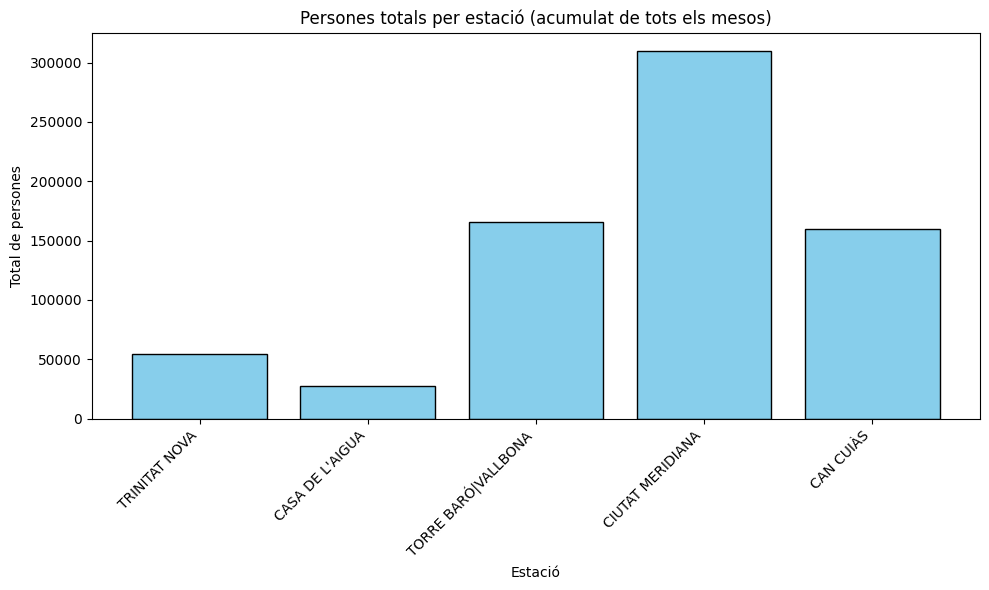

In [3]:
for linia in linies:
    plt.figure(figsize=(10,6))
    plt.bar(linia["Parada"].iloc[:-1], linia["ACUMULAT"].iloc[:-1], color="skyblue", edgecolor="black")
    plt.title("Persones totals per estació (acumulat de tots els mesos)")
    plt.xlabel("Estació")
    plt.ylabel("Total de persones")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

{'HOSPITAL DE BELLVITGE': 852653.0, 'BELLVITGE': 1192851.0, 'AV. CARRILET': 2188537.0, 'R.J.OLIVERAS': 1298314.0, 'CAN SERRA': 1169192.0, 'FLORIDA': 1488867.0, 'TORRASSA': 2948651.0, 'STA. EULÀLIA': 2963090.0, 'MERCAT NOU': 911450.0, 'PL. DE SANTS': 3174056.000000001, 'HOSTAFRANCS': 1083943.0, 'ESPANYA': 7718459.0, 'ROCAFORT': 2361564.0, 'URGELL': 2056317.0, 'UNIVERSITAT': 4261347.000000001, 'CATALUNYA': 8587741.0, 'URQUINAONA': 4013455.0, 'ARC DEL TRIOMF': 3183732.0, 'MARINA': 2098088.0, 'GLÒRIES': 3760515.0, 'CLOT': 3562762.0, 'NAVAS': 1377947.0, 'SAGRERA': 6369312.0, 'FABRA I PUIG': 3685456.0, 'ST. ANDREU': 2310442.0, 'TORRAS I BAGES': 1385162.0, 'TRINITAT VELLA': 844891.0, 'BARÓ DE VIVER': 262232.0, 'STA. COLOMA': 1927346.0, 'FONDO': 2966453.0, 'PARAL.LEL': 4570688.477187964, 'SANT ANTONI': 2331171.0, 'PG. DE GRÀCIA': 1683152.0976348594, 'TETUAN': 1362361.0, 'MONUMENTAL': 1052454.0, 'SGDA. FAMÍLIA': 6410288.0, 'ENCANTS': 1168616.0, 'BAC DE RODA': 1511495.0, 'SANT MARTÍ': 1665580.0,

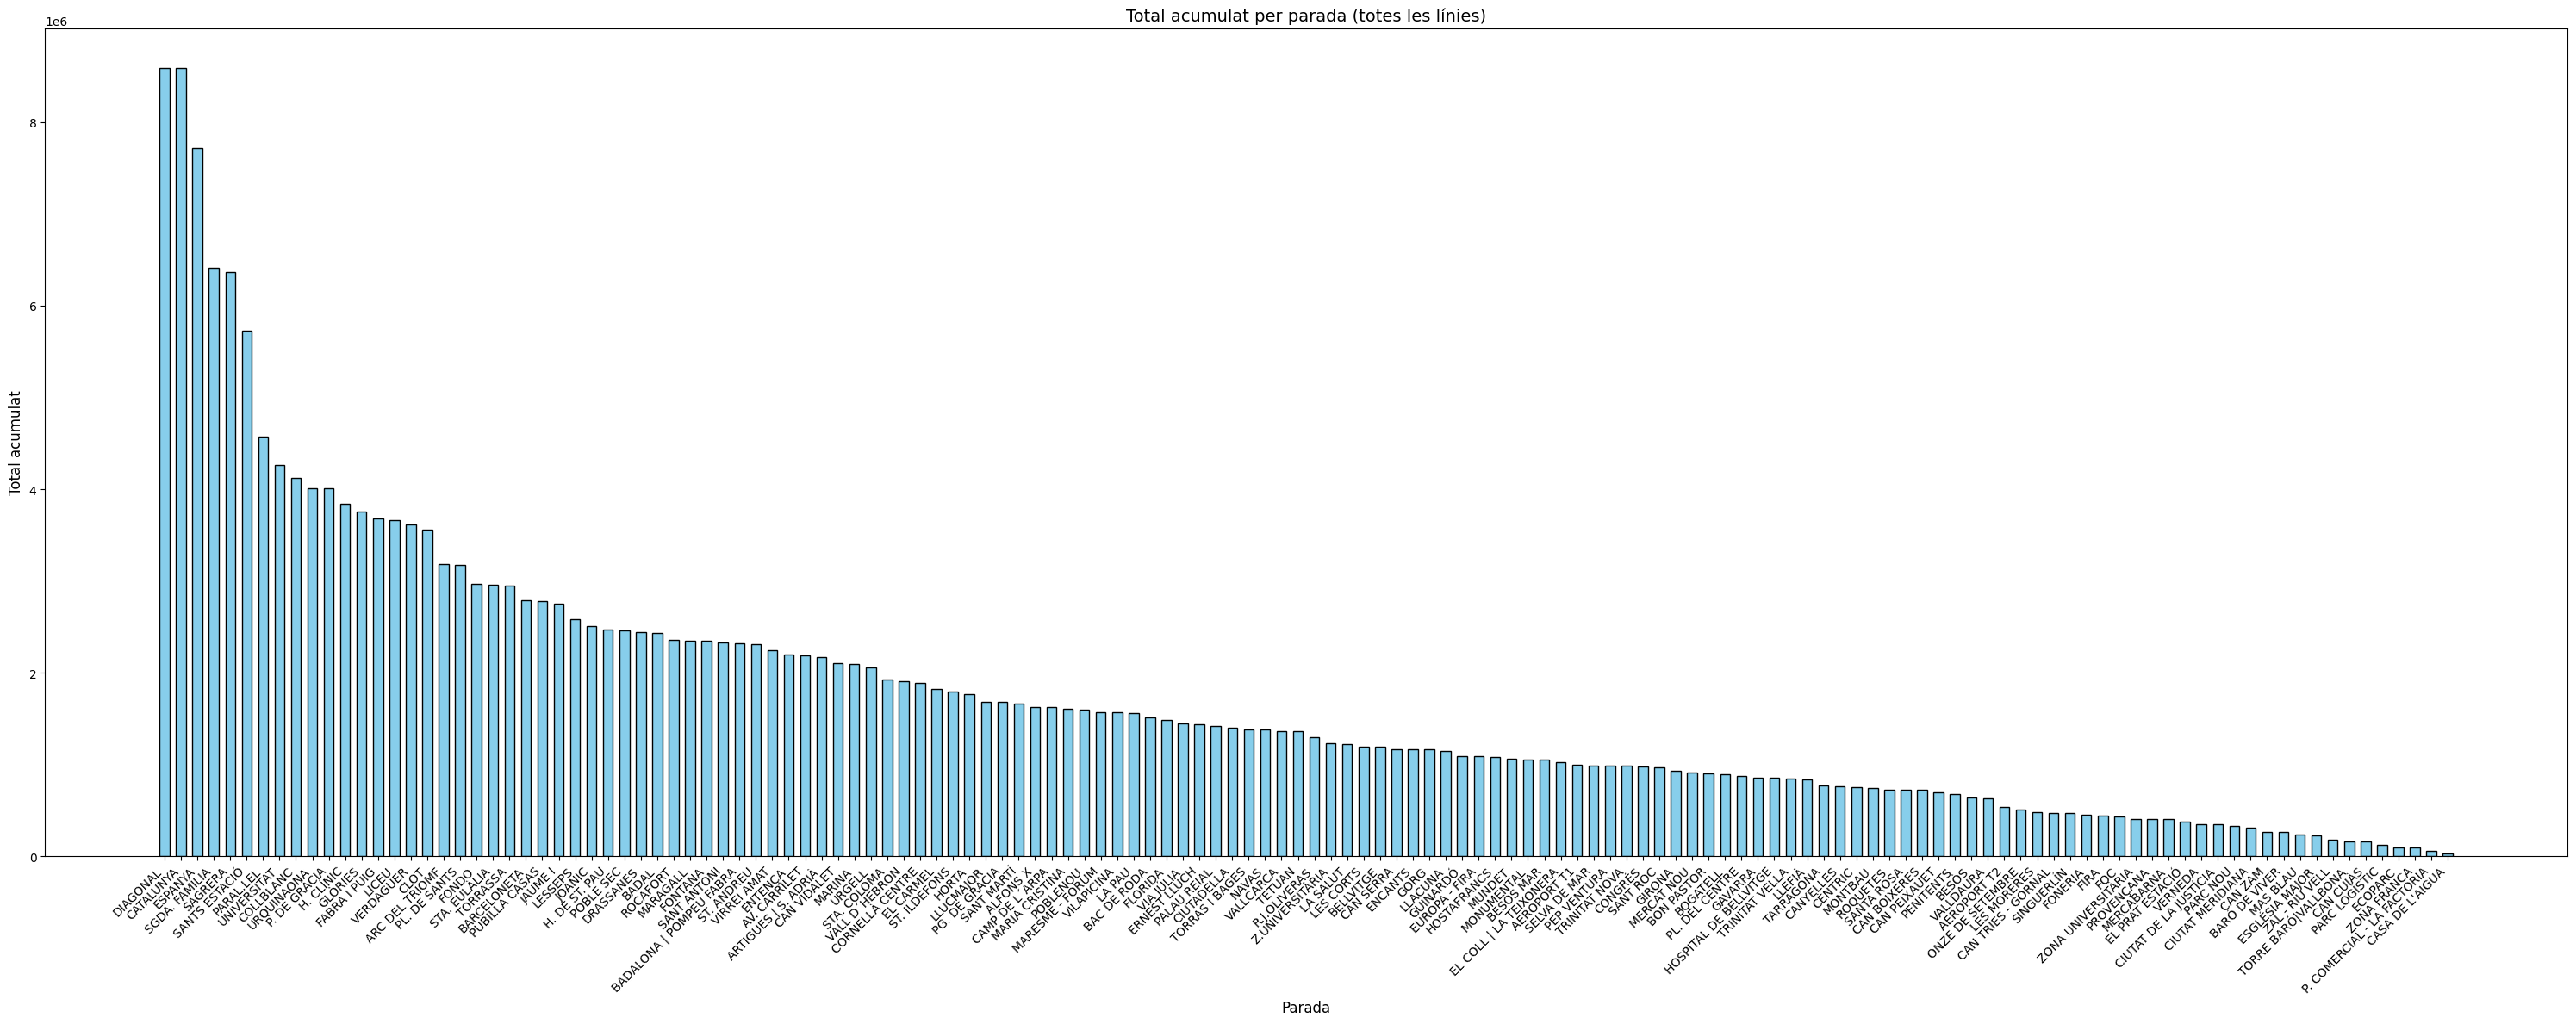

'\nparadas = {}\n\nfor linia in linies:\n    for i in linia["Parada"].iloc[1:-1]:\n        if (i not in paradas):\n            paradas[i] = 0\nfor linia in linies:\n    for i in linia["Parada"].iloc[1:-1]:\n        paradas[i] += linia["ACUMULAT"]\n\nprint(paradas)\n\n\n'

In [4]:
paradas = {}

for linia in linies:
    # recorremos las filas del DataFrame excepto la primera y la última
    for _, fila in linia.iloc[:-1].iterrows():
        parada = fila["Parada"]
        acumulat = fila["ACUMULAT"]

        if parada not in paradas:
            paradas[parada] = 0

        paradas[parada] += acumulat

print(paradas)

df_paradas = pd.DataFrame(paradas.items(), columns=["Parada", "Total"])
df_paradas = df_paradas.sort_values("Total", ascending=False)

plt.figure(figsize=(30,12))  # más ancho para más espacio visual
plt.bar(df_paradas["Parada"], df_paradas["Total"], color="skyblue", edgecolor="black", width=0.6)  # <-- más espacio entre barras

plt.title("Total acumulat per parada (totes les línies)", fontsize=14)
plt.xlabel("Parada", fontsize=12)
plt.ylabel("Total acumulat", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
"""
paradas = {}

for linia in linies:
    for i in linia["Parada"].iloc[1:-1]:
        if (i not in paradas):
            paradas[i] = 0
for linia in linies:
    for i in linia["Parada"].iloc[1:-1]:
        paradas[i] += linia["ACUMULAT"]

print(paradas)


"""

In [5]:
print(len(paradas))
estacions = pd.read_excel("Data/rawData/TMB/estacions.xlsx")


140


In [ ]:
estacions

,FID,ID_ESTACIO,CODI_GRUP_ESTACIO,NOM_ESTACIO,PICTO,DATA,GEOMETRY
0,ESTACIONS.111,111,6660111,HOSPITAL DE BELLVITGE,L1,2025-11-08,POINT (2.1072421350644093 41.344677452264776)
1,ESTACIONS.112,112,6660112,Bellvitge,L1,2025-11-08,POINT (2.1109182897923735 41.35097352459213)
2,ESTACIONS.113,113,6660113,Av. Carrilet,L1,2025-11-08,POINT (2.1026452939747284 41.35852162448053)
3,ESTACIONS.114,114,6660114,R.J.OLIVERAS,L1,2025-11-08,POINT (2.0997493392175293 41.3640899130925)
4,ESTACIONS.115,115,6660115,Can Serra,L1,2025-11-08,POINT (2.10275470564125 41.36769339471756)
...,...,...,...,...,...,...,...
134,ESTACIONS.1137,1137,6661137,Casa de l'Aigua,L11,2025-11-08,POINT (2.1848396459573656 41.451277844017426)
135,ESTACIONS.1138,1138,6661138,TORRE BARÓ|VALLBONA,L11,2025-11-08,POINT (2.1798835778205032 41.45919574810995)
136,ESTACIONS.1139,1139,6661139,Ciutat Meridiana,L11,2025-11-08,POINT (2.174649879224937 41.46080820561607)
137,ESTACIONS.1140,1140,6661140,Can Cuiàs,L11,2025-11-08,POINT (2.173059363097836 41.46241309910048)


In [6]:
estacions["NOM_ESTACIO"] = estacions["NOM_ESTACIO"].str.upper()

In [7]:
estacions

,FID,ID_ESTACIO,CODI_GRUP_ESTACIO,NOM_ESTACIO,PICTO,DATA,GEOMETRY
0,ESTACIONS.111,111,6660111,HOSPITAL DE BELLVITGE,L1,2025-11-08,POINT (2.1072421350644093 41.344677452264776)
1,ESTACIONS.112,112,6660112,BELLVITGE,L1,2025-11-08,POINT (2.1109182897923735 41.35097352459213)
2,ESTACIONS.113,113,6660113,AV. CARRILET,L1,2025-11-08,POINT (2.1026452939747284 41.35852162448053)
3,ESTACIONS.114,114,6660114,R.J.OLIVERAS,L1,2025-11-08,POINT (2.0997493392175293 41.3640899130925)
4,ESTACIONS.115,115,6660115,CAN SERRA,L1,2025-11-08,POINT (2.10275470564125 41.36769339471756)
...,...,...,...,...,...,...,...
134,ESTACIONS.1137,1137,6661137,CASA DE L'AIGUA,L11,2025-11-08,POINT (2.1848396459573656 41.451277844017426)
135,ESTACIONS.1138,1138,6661138,TORRE BARÓ|VALLBONA,L11,2025-11-08,POINT (2.1798835778205032 41.45919574810995)
136,ESTACIONS.1139,1139,6661139,CIUTAT MERIDIANA,L11,2025-11-08,POINT (2.174649879224937 41.46080820561607)
137,ESTACIONS.1140,1140,6661140,CAN CUIÀS,L11,2025-11-08,POINT (2.173059363097836 41.46241309910048)


In [8]:
paradas

{'HOSPITAL DE BELLVITGE': 852653.0,
 'BELLVITGE': 1192851.0,
 'AV. CARRILET': 2188537.0,
 'R.J.OLIVERAS': 1298314.0,
 'CAN SERRA': 1169192.0,
 'FLORIDA': 1488867.0,
 'TORRASSA': 2948651.0,
 'STA. EULÀLIA': 2963090.0,
 'MERCAT NOU': 911450.0,
 'PL. DE SANTS': 3174056.000000001,
 'HOSTAFRANCS': 1083943.0,
 'ESPANYA': 7718459.0,
 'ROCAFORT': 2361564.0,
 'URGELL': 2056317.0,
 'UNIVERSITAT': 4261347.000000001,
 'CATALUNYA': 8587741.0,
 'URQUINAONA': 4013455.0,
 'ARC DEL TRIOMF': 3183732.0,
 'MARINA': 2098088.0,
 'GLÒRIES': 3760515.0,
 'CLOT': 3562762.0,
 'NAVAS': 1377947.0,
 'SAGRERA': 6369312.0,
 'FABRA I PUIG': 3685456.0,
 'ST. ANDREU': 2310442.0,
 'TORRAS I BAGES': 1385162.0,
 'TRINITAT VELLA': 844891.0,
 'BARÓ DE VIVER': 262232.0,
 'STA. COLOMA': 1927346.0,
 'FONDO': 2966453.0,
 'PARAL.LEL': 4570688.477187964,
 'SANT ANTONI': 2331171.0,
 'PG. DE GRÀCIA': 1683152.0976348594,
 'TETUAN': 1362361.0,
 'MONUMENTAL': 1052454.0,
 'SGDA. FAMÍLIA': 6410288.0,
 'ENCANTS': 1168616.0,
 'BAC DE RODA'

In [16]:

estacions["GEOMETRY"] = estacions["GEOMETRY"].apply(wkt.loads)

estacions["PERSONA"] = estacions["NOM_ESTACIO"].map(paradas)

estacions = gpd.GeoDataFrame(estacions, geometry="GEOMETRY", crs="EPSG:4326")

In [ ]:
estacions

,FID,ID_ESTACIO,CODI_GRUP_ESTACIO,NOM_ESTACIO,PICTO,DATA,GEOMETRY,PERSONA
0,ESTACIONS.111,111,6660111,HOSPITAL DE BELLVITGE,L1,2025-11-08,POINT (2.1072421350644093 41.344677452264776),852653.0
1,ESTACIONS.112,112,6660112,BELLVITGE,L1,2025-11-08,POINT (2.1109182897923735 41.35097352459213),1192851.0
2,ESTACIONS.113,113,6660113,AV. CARRILET,L1,2025-11-08,POINT (2.1026452939747284 41.35852162448053),2188537.0
3,ESTACIONS.114,114,6660114,R.J.OLIVERAS,L1,2025-11-08,POINT (2.0997493392175293 41.3640899130925),1298314.0
4,ESTACIONS.115,115,6660115,CAN SERRA,L1,2025-11-08,POINT (2.10275470564125 41.36769339471756),1169192.0
...,...,...,...,...,...,...,...,...
134,ESTACIONS.1137,1137,6661137,CASA DE L'AIGUA,L11,2025-11-08,POINT (2.1848396459573656 41.451277844017426),27519.0
135,ESTACIONS.1138,1138,6661138,TORRE BARÓ|VALLBONA,L11,2025-11-08,POINT (2.1798835778205032 41.45919574810995),165729.0
136,ESTACIONS.1139,1139,6661139,CIUTAT MERIDIANA,L11,2025-11-08,POINT (2.174649879224937 41.46080820561607),309620.0
137,ESTACIONS.1140,1140,6661140,CAN CUIÀS,L11,2025-11-08,POINT (2.173059363097836 41.46241309910048),159627.0


In [17]:

estacions.to_file("estacions.geojson", driver="GeoJSON", encoding="utf-8")